
# Лабораторна робота 4
# Другий рівень(ускладнений)



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = r"C:\Users\ВМ-Техніка\Desktop\АД\лаб4.2\winequality-red.csv"

df = pd.read_csv(file_path, sep=";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Поборотися із зниклими даними:

In [4]:
print("Пропущені значення:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

np_arr = df.to_numpy()

col_means = np.nanmean(np_arr, axis=0)
inds = np.isnan(np_arr)
np_arr[inds] = np.take(col_means, np.where(inds)[1])

print("Оновлений масив NumPy:")
print(np_arr)


Пропущені значення:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Оновлений масив NumPy:
[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


## 2. Нормалізація

In [5]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

df_normalized = df.copy()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_normalized[numerical_cols] = df_normalized[numerical_cols].apply(normalize)

np_normalized = np_arr.copy()
np_normalized = (np_normalized - np_normalized.min(axis=0)) / (np_normalized.max(axis=0) - np_normalized.min(axis=0))

print("Normalized DataFrame:")
print(df_normalized.head())

print("\nNormalized NumPy array:")
print(np_normalized[:5]) 


Normalized DataFrame:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846

## 3. Гістограма по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах,

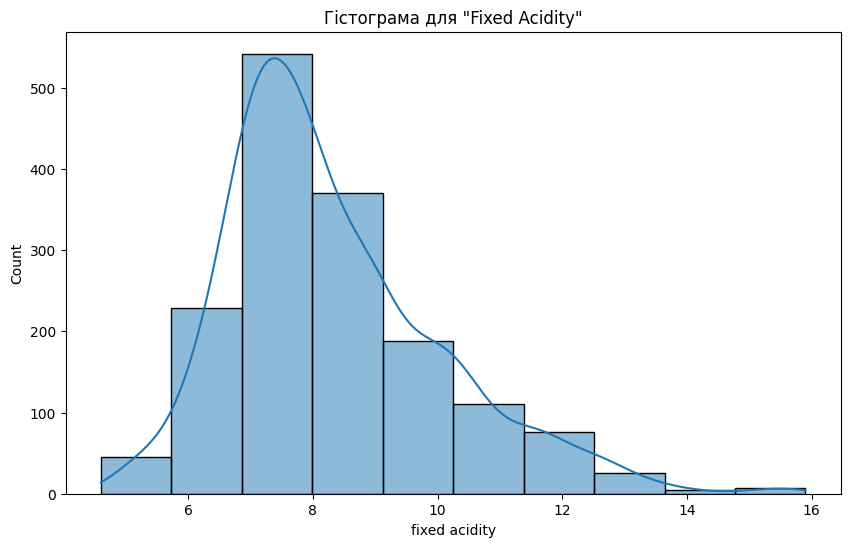

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fixed acidity'], bins=10, kde=True)
plt.title('Гістограма для "Fixed Acidity"')
plt.show()

## 4. Графік залежності

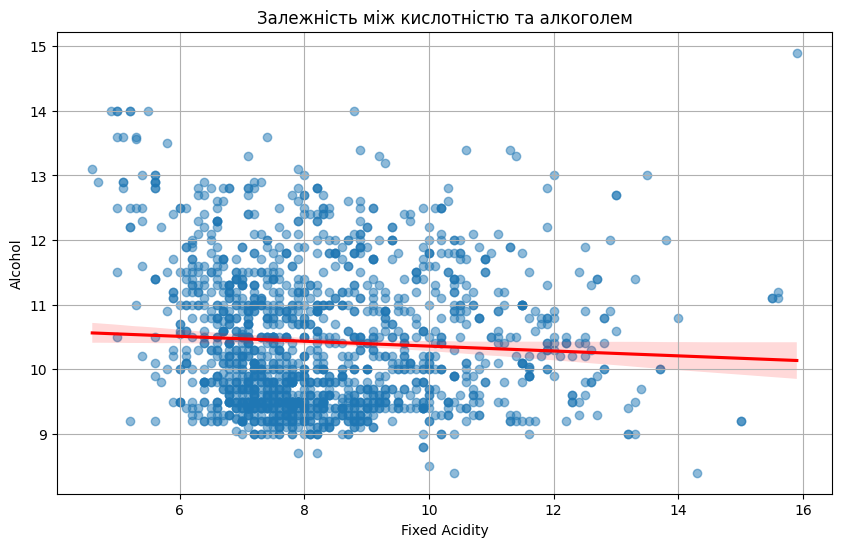

In [33]:
x = df['fixed acidity']
y = df['alcohol']

plt.figure(figsize=(10, 6))
sns.regplot(x='fixed acidity', y='alcohol', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Залежність між кислотністю та алкоголем')
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.grid(True)
plt.show()

## 5. Коефіцієнт Пірсона та Спірмена

In [27]:
pearson_corr = df[['fixed acidity', 'citric acid']].corr(method='pearson')
spearman_corr = df[['fixed acidity', 'citric acid']].corr(method='spearman')

print("Коефіцієнт Пірсона:\n", pearson_corr)
print("Коефіцієнт Спірмена:\n", spearman_corr)


Коефіцієнт Пірсона:
                fixed acidity  citric acid
fixed acidity       1.000000     0.671703
citric acid         0.671703     1.000000
Коефіцієнт Спірмена:
                fixed acidity  citric acid
fixed acidity       1.000000     0.661708
citric acid         0.661708     1.000000


## 6. One Hot Encoding

In [30]:
df_encoded = pd.get_dummies(df, columns=['quality'], prefix='quality')

print(df_encoded.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality_3  quality_4  quality_5  quality_6  quality_7  quality_8  
0      

## 7. Візуалізація багатовимірних даних

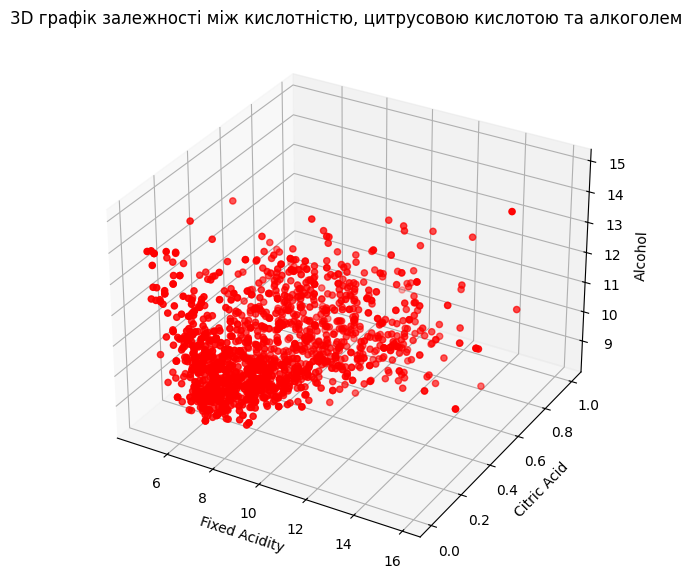

In [36]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['fixed acidity']
y = df['citric acid']
z = df['alcohol']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Citric Acid')
ax.set_zlabel('Alcohol')
ax.set_title('3D графік залежності між кислотністю, цитрусовою кислотою та алкоголем')

plt.show()